### Load Suara Ke Librosa dan Menghitung nilai MFCC
#### MFCC (Mel-frequency cepstral coefficients) dihitung dalam bentuk 2D array (List) 

In [77]:
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

y1, sr1 = librosa.load('bacaan/ustazah/1/ustazah/1/1.wav')
y2, sr2 = librosa.load('1~12.wav')


# plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
# # print(mfcc1)
# display.specshow(mfcc1)

# plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2,sr2) 
# # print(mfcc2)
# display.specshow(mfcc2)

#### Menampilkan visualisasi suara 1 dalam bentuk  waveshow 

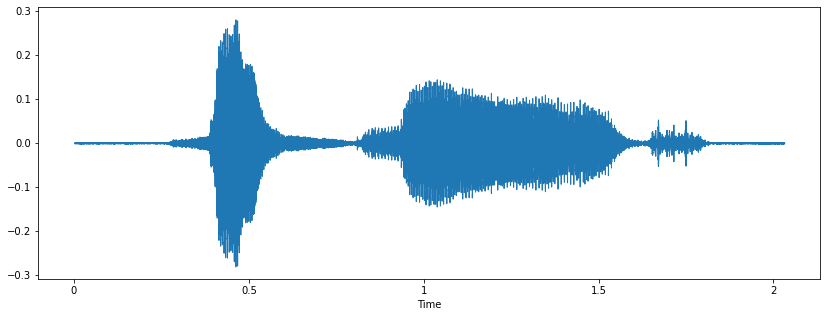

In [78]:
# fig, ax = plt.subplots()
plt.figure(figsize=(14, 5))
display.waveshow(y1, sr=sr1)
plt.savefig('spec.png')

#### Menampilkan visualisasi suara 2 dalam bentuk  waveshow 

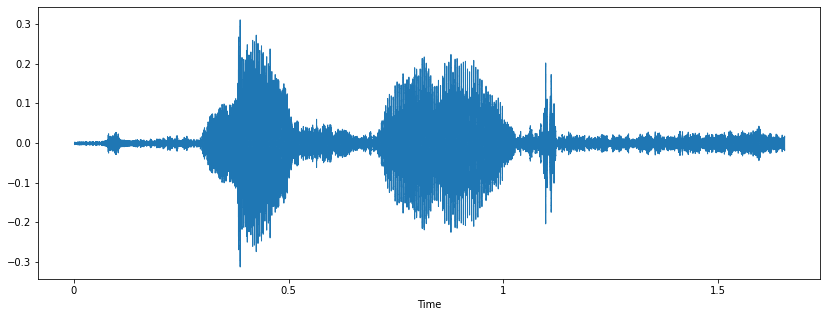

In [79]:
plt.figure(figsize=(14, 5))
display.waveshow(y2, sr=sr2)
plt.savefig('spec1.png')

#### Menghitung jarak normlisasi antara dua suara
#### Semakin dekat dengan angka 0, semakin mirip/sama kedua suara tersebut

In [80]:
from dtw import dtw
from numpy.linalg import norm

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds: '+ dist.__str__())

Normalized distance between the two sounds: 35539.630615234375


#### Menghitung kesamaan/kemiripan dua suara dengan sumus cosine_similarity

In [81]:


def dot(A,B): 
    return (sum(a*b for a,b in zip(A,B)))

def cosine_similarity(a,b):
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )
  

array1 = []
for nums in mfcc1:
    for val in nums:
        array1.append(val)
        
array2 = []
for nums in mfcc2:
    for val in nums:
        array2.append(val)
        

print(cosine_similarity(array1, array2))

0.6609852797540173
